<a href="https://colab.research.google.com/github/KBVBrahmarao/datasciencecoursera/blob/main/Timeseries2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

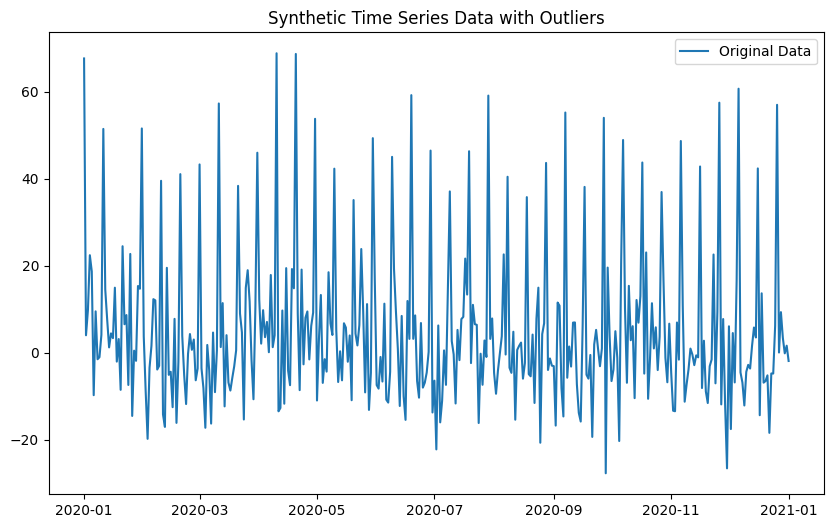

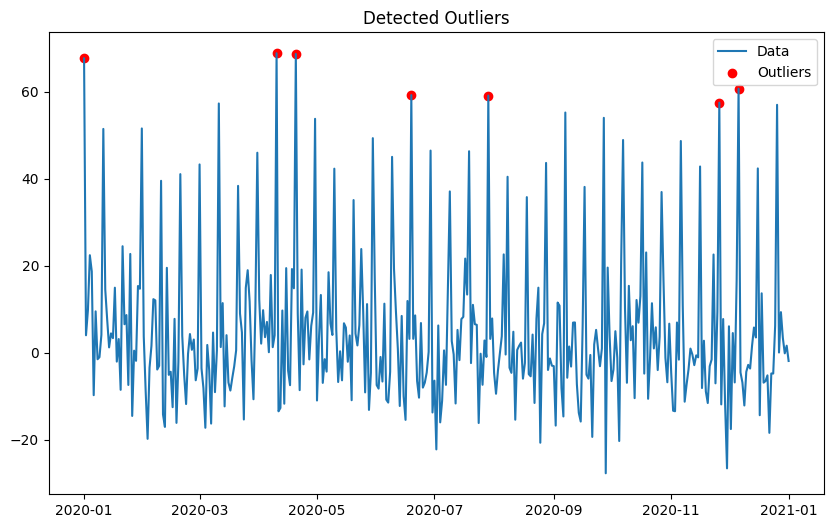

1


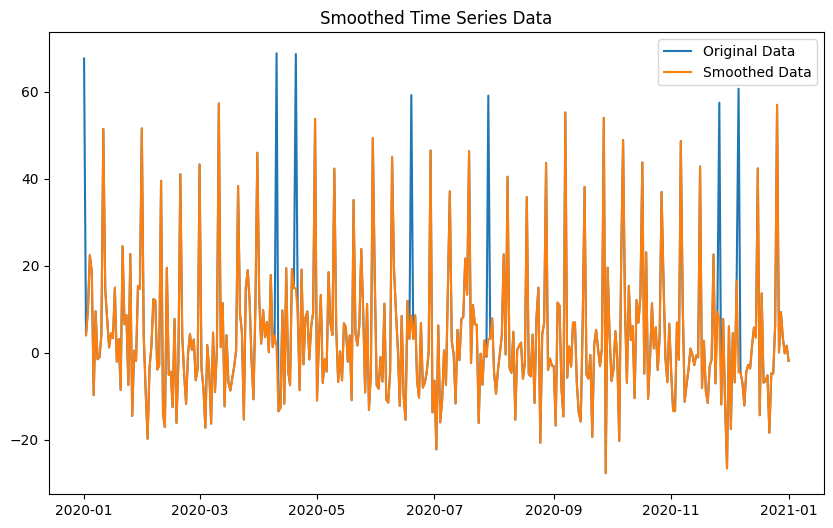

Error in decomposition: This function does not handle missing values


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import zscore

# Optional: To display plots inline in Jupyter Notebook
%matplotlib inline

# Generating a synthetic time series data
np.random.seed(0)
date_rng = pd.date_range(start='1/1/2020', end='1/01/2021', freq='D')
data = np.random.randn(len(date_rng)) * 10
data[::10] += 50  # Injecting outliers every 10th point
df = pd.DataFrame(date_rng, columns=['date'])
df['data'] = data
df.set_index('date', inplace=True)

# Plot the synthetic data
plt.figure(figsize=(10, 6))
plt.plot(df, label='Original Data')
plt.title('Synthetic Time Series Data with Outliers')
plt.legend()
plt.show()

# Calculate the Z-scores
df['z_score'] = zscore(df['data'])

# Set a threshold for identifying outliers
threshold = 3
df['outlier'] = df['z_score'].apply(lambda x: abs(x) > threshold)

# Plot the data with outliers marked
plt.figure(figsize=(10, 6))
plt.plot(df['data'], label='Data')
plt.scatter(df[df['outlier']].index, df[df['outlier']]['data'], color='red', label='Outliers')
plt.title('Detected Outliers')
plt.legend()
plt.show()

# Function to replace outliers with median of rolling window
def smooth_outliers(data, window_size=5):
    rolling_median = data.rolling(window=window_size, center=True).median()
    smoothed_data = data.copy()
    smoothed_data[df['outlier']] = rolling_median[df['outlier']]
    return smoothed_data

# Smooth the data
window_size = 5
df['smoothed_data'] = smooth_outliers(df['data'], window_size)

# Fill missing values by interpolation
df['smoothed_data'] = df['smoothed_data'].interpolate()

# Check for remaining NaN values
print(df['smoothed_data'].isna().sum())  # This should print 0 if there are no NaN values

# Plot the original and smoothed data
plt.figure(figsize=(10, 6))
plt.plot(df['data'], label='Original Data')
plt.plot(df['smoothed_data'], label='Smoothed Data')
plt.title('Smoothed Time Series Data')
plt.legend()
plt.show()

# Decompose the time series
period = 365  # Assuming yearly seasonality for daily data

try:
    decomposition = seasonal_decompose(df['smoothed_data'], model='additive', period=period)

    # Plot the decomposed components
    plt.figure(figsize=(12, 8))
    plt.subplot(411)
    plt.plot(decomposition.observed, label='Observed')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonal')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residual')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

except ValueError as e:
    print(f"Error in decomposition: {e}")